# 데이터 전처리

In [425]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#데이터 시각화 + 패키지
import seaborn as sns
#통계 분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
#그래프 표시
%matplotlib inline
#선형 회귀분석모델 formula(y ~ X1 + X2 +)
import statsmodels.formula.api as smf
#회귀분석의 정규성 확인
from statsmodels.api import qqplot,add_constant
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#학습용과 평가용 데이터 분리
from sklearn.model_selection import train_test_split
#선형회귀모형 
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
#평가함수
from sklearn.metrics import r2_score

matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

#릿지 사용
from sklearn.linear_model import Ridge

#라쏘 사용
from sklearn.linear_model import Lasso 

#엘라스틱넷 사용
from sklearn.linear_model import ElasticNet 

#graphviz : 나무 구조 시각화 및 의사결정나무
import graphviz 

from sklearn.tree import DecisionTreeRegressor, export_graphviz

#예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 예측/회귀 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

# 예측/회귀 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor
matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [426]:
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

In [427]:
df =pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/Car.csv",encoding = 'euc-kr')
df.head() # 데이터 불러오기

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [428]:
df.isnull().sum() # 

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [430]:
print(df['Power'].unique())

['58.16 bhp' '126.2 bhp' '88.7 bhp' '88.76 bhp' '140.8 bhp' '55.2 bhp'
 '63.1 bhp' '171.5 bhp' '103.6 bhp' '74 bhp' '103.25 bhp' '116.3 bhp'
 '187.7 bhp' '115 bhp' '175.56 bhp' '98.6 bhp' '83.8 bhp' '167.62 bhp'
 '190 bhp' '88.5 bhp' '177.01 bhp' '80 bhp' '67.1 bhp' '102 bhp'
 '108.45 bhp' '138.1 bhp' '184 bhp' '179.5 bhp' '103.5 bhp' '64 bhp'
 '82 bhp' '254.8 bhp' '73.9 bhp' '46.3 bhp' '37.5 bhp' '77 bhp' '82.9 bhp'
 '149.92 bhp' '138.03 bhp' '112.2 bhp' '163.7 bhp' '71 bhp' '105 bhp'
 '174.33 bhp' '75 bhp' '103.2 bhp' '53.3 bhp' '78.9 bhp' '147.6 bhp'
 '147.8 bhp' '68 bhp' '186 bhp' '170 bhp' '69 bhp' '140 bhp' '78 bhp'
 '194 bhp' '500 bhp' '108.5 bhp' '86.8 bhp' '187.74 bhp' 'null bhp'
 '132 bhp' '86.7 bhp' '73.94 bhp' '117.3 bhp' '218 bhp' '168.5 bhp'
 '89.84 bhp' '110 bhp' '90 bhp' '82.85 bhp' '67 bhp' '241.4 bhp' '35 bhp'
 '270.9 bhp' '126.32 bhp' '73 bhp' '130 bhp' '100.6 bhp' '150 bhp'
 '75.94 bhp' '215 bhp' '107.3 bhp' '37.48 bhp' '120 bhp' '178 bhp'
 '152 bhp' '91.1 bhp' '85.

In [431]:
df['Power'] = df['Power'].replace('null bhp', np.nan)

In [432]:
print(df['Engine'].unique())

['998 CC' '1582 CC' '1199 CC' '1248 CC' '1968 CC' '814 CC' '1461 CC'
 '2755 CC' '1598 CC' '1462 CC' '1497 CC' '2179 CC' '2477 CC' '1498 CC'
 '2143 CC' '1995 CC' '1984 CC' '1197 CC' '2494 CC' '1798 CC' '2696 CC'
 '2698 CC' '1061 CC' '1198 CC' '2987 CC' '796 CC' '624 CC' '1999 CC'
 '1991 CC' '2694 CC' '1120 CC' '2498 CC' '799 CC' '2393 CC' '1399 CC'
 '1796 CC' '2148 CC' '1396 CC' '1950 CC' '4806 CC' '1998 CC' '1086 CC'
 '1193 CC' '2982 CC' '1493 CC' '2967 CC' '2993 CC' '1196 CC' '1799 CC'
 '2497 CC' '2354 CC' '1373 CC' '2996 CC' '1591 CC' '2894 CC' '5461 CC'
 '1595 CC' '936 CC' '1997 CC' nan '1896 CC' '1390 CC' '1364 CC' '2199 CC'
 '993 CC' '999 CC' '1405 CC' '2956 CC' '1794 CC' '995 CC' '2496 CC'
 '1599 CC' '2400 CC' '1495 CC' '2523 CC' '793 CC' '4134 CC' '1596 CC'
 '1395 CC' '2953 CC' '1586 CC' '2362 CC' '1496 CC' '1368 CC' '1298 CC'
 '1956 CC' '1299 CC' '3498 CC' '2835 CC' '1150 CC' '3198 CC' '1343 CC'
 '1499 CC' '1186 CC' '1590 CC' '2609 CC' '2499 CC' '2446 CC' '1978 CC'
 '2360 CC' '

In [433]:
df.drop(columns = ['New_Price'],inplace = True) # New_Price의 열 경우 결측치도 많고 사용할 변수가 아니기에 제거
df['Mileage'] = df['Mileage'].str.replace('kmpl',"")
df['Engine'] = df['Engine'].str.replace('CC',"")
df['Power'] = df['Power'].str.replace('bhp',"")
df['Mileage'] = df['Mileage'].astype('float64')
df['Engine'] = df['Engine'].astype('float64')
df['Power'] = df['Power'].astype('float64')
df.info() #  수치형 변수인 Engine와 Power, Mileage 변수 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


In [434]:
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0


<Axes: >

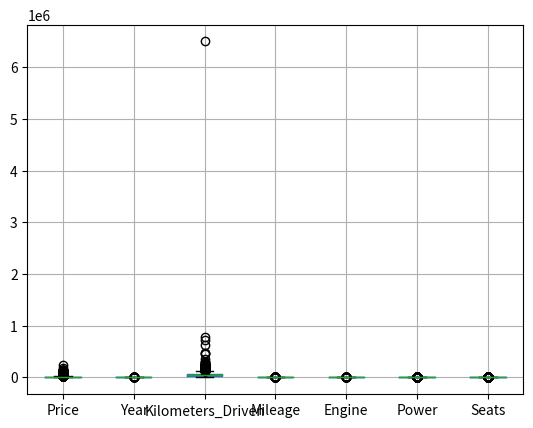

In [435]:
df.boxplot() # kilometers_Driven에서 이상치 의심

In [436]:
weird.k = df.loc[df['Kilometers_Driven'] >= 500000]
weird.k # 주행거리가 6,500,000km는 말이 안되기 때문에 제거

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,11497.20,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0
358,Hyundai i10 Magna 1.2,Chennai,4138.99,2009,620000,Petrol,Manual,First,20.36,1197.0,78.9,5.0
1860,Volkswagen Vento Diesel Highline,Chennai,9044.46,2013,720000,Diesel,Manual,First,20.54,1598.0,103.6,5.0
2328,BMW X5 xDrive 30d M Sport,Chennai,99642.40,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0


In [437]:
weird.p = df.loc[df['Price'] <= 1000]
weird.p 

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
274,Maruti Zen VXI BSII,Mumbai,843.13,2002,60000,Petrol,Manual,Third,17.30,993.0,60.00,5.0
364,Maruti Zen LX,Kolkata,996.42,2003,65000,Petrol,Manual,First,17.30,993.0,60.00,5.0
631,Hyundai Santro LS zipPlus,Chennai,996.42,2002,70000,Petrol,Manual,Third,0.00,1086.0,NaN,5.0
1628,Maruti 800 Std BSIII,Jaipur,689.83,2004,12000,Petrol,Manual,Second,16.10,796.0,37.00,4.0
1713,Tata Nano Lx,Pune,674.50,2011,65000,Petrol,Manual,Second,26.00,624.0,35.00,4.0
2605,Tata Nano Cx,Jaipur,766.48,2010,57000,Petrol,Manual,First,26.00,624.0,35.00,4.0
2847,Hyundai Getz GLS,Pune,689.83,2005,86000,Petrol,Manual,Second,15.30,1341.0,83.00,5.0
3138,Maruti Zen LXI,Jaipur,689.83,1998,95150,Petrol,Manual,Third,17.30,993.0,60.00,5.0
3228,Maruti 800 Std,Pune,766.48,2003,52000,Petrol,Manual,First,16.10,796.0,37.00,4.0
3923,Hyundai Accent GLE,Hyderabad,919.78,2004,110000,Petrol,Manual,First,13.20,1495.0,94.00,5.0


In [438]:
df.drop(df[df['Kilometers_Driven'] >= 500000].index, inplace=True)
# BMX X5 xDrive 30d M Sport의 경우 연식은 2017년이지만 주행거리는 6,500,000을 나타내고 있다.
# 연식에 비해 엄청나게 큰 수치를 보이고 있고 다른 데이터들에 비해서 터무니 없는 값을 보이고 있기 때문에 제외
df.drop(df[df['Price'] <= 10].index, inplace=True)
# 중고차 가격의 경우외 price = 7.08은 허위매물 또는 사기일 가능성이 높기 때문에 제외

<Axes: >

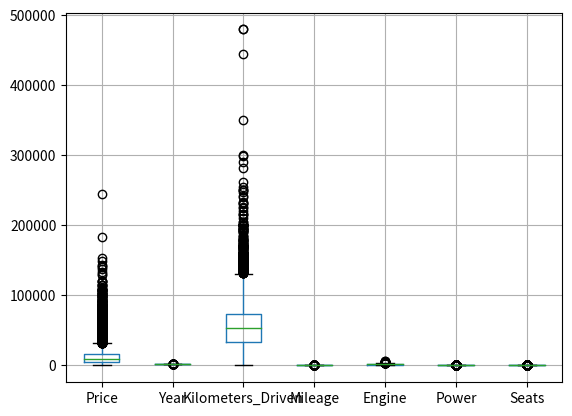

In [439]:
df.boxplot()

In [440]:
df['Brand'] = df['Name'].str.split().str[0]

print(df)

                                                   Name    Location     Price  \
0                                Maruti Wagon R LXI CNG      Mumbai   2682.68   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  19162.00   
2                                          Honda Jazz V     Chennai   6898.32   
3                                     Maruti Ertiga VDI     Chennai   9197.76   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  27194.71   
...                                                 ...         ...       ...   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad       NaN   
7249                             Volkswagen Polo GT TSI      Mumbai       NaN   
7250                             Nissan Micra Diesel XV     Kolkata       NaN   
7251                             Volkswagen Polo GT TSI        Pune       NaN   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi       NaN   

      Year  Kilometers_Driv

In [441]:
df.drop("Name", axis=1, inplace=True)
df

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,Volkswagen
7249,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,Volkswagen
7250,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,Nissan
7251,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,Volkswagen


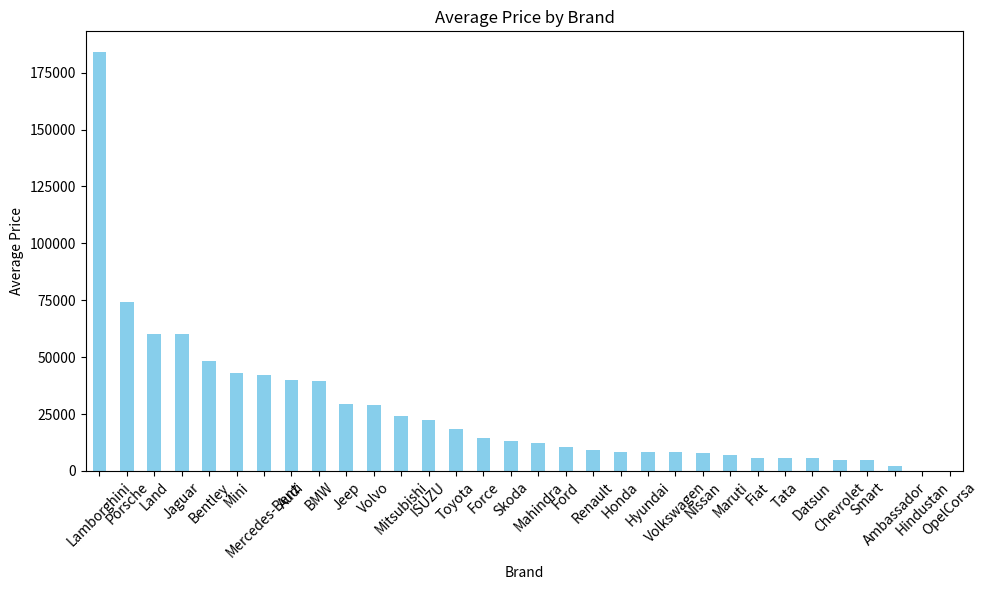

In [386]:
brand_prices = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))
brand_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
# 람보르기니 같은 경우 표본이 한 개이고 가격 또한 내가 찾고자 하는 가성비 차가 아니기 때문에 제거

In [448]:
df.drop(df[df['Brand'].str.upper() == 'LAMBORGHINI'].index, inplace=True)
df

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti
1,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Hyderabad,NaN,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,Volkswagen
7249,Mumbai,NaN,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,Volkswagen
7250,Kolkata,NaN,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,Nissan
7251,Pune,NaN,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,Volkswagen


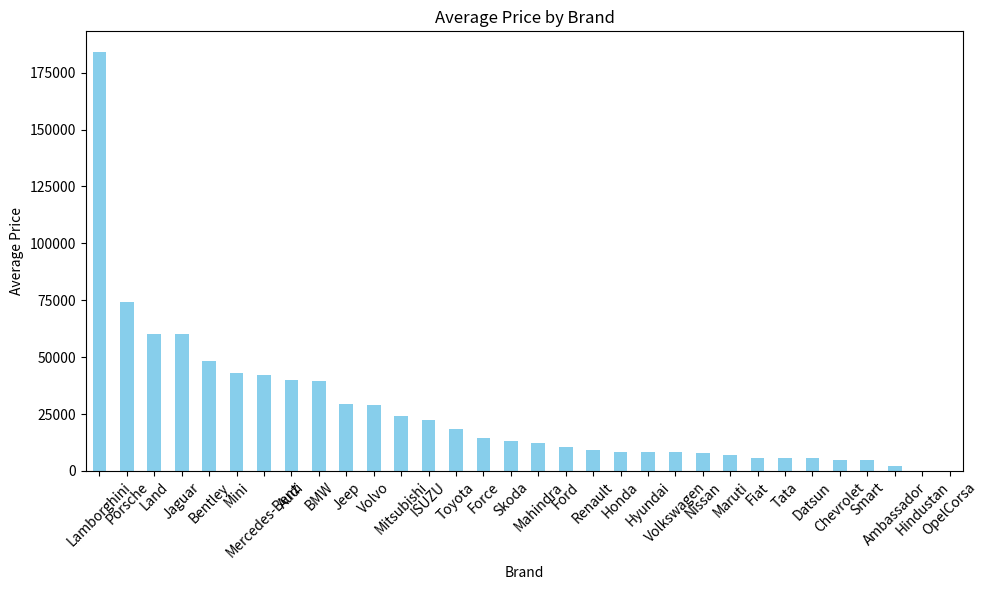

In [449]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
brand_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()